In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, BaggingRegressor,GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgm
import catboost as ctb

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [6]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
X = data.drop(columns = 'quality')
y = data.quality

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [16]:
classifiers = [DecisionTreeClassifier(), BaggingClassifier(n_estimators= 100), RandomForestClassifier(n_estimators=100)]
cv = KFold(5, shuffle=True, random_state= 42)
for model in classifiers:
    score = cross_val_score(model, X, y, cv = cv, scoring='accuracy').mean()

    print(f'Model: {model}')
    print(f'Score: {score}')

Model: DecisionTreeClassifier()
Score: 0.6172884012539186
Model: BaggingClassifier(n_estimators=100)
Score: 0.68921434169279
Model: RandomForestClassifier()
Score: 0.706712382445141


Случайные леса показывают высокую точность

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [28]:
range_size = [x for x in range(400, 5200, 200)]
init_size = [10, 50, 100, 200]
size = init_size + range_size

In [30]:
metrics = []
for n in size:
    model = RandomForestClassifier(n_estimators= n)
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    metrics.append(score)

print(score)

0.6666666666666666


Text(0.5, 1.0, 'Accuracy vs. number of trees')

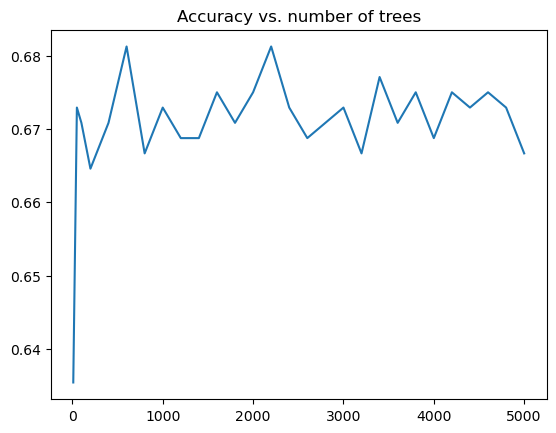

In [39]:
plt.plot(size, metrics)
plt.title('Accuracy vs. number of trees')

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [67]:
model = GradientBoostingClassifier(random_state=42)
score = cross_val_score(model, X, y, cv = 5, scoring= 'accuracy').mean()
print(f'Model: {model}')
print(f'Score: {score}')

Model: GradientBoostingClassifier(random_state=42)
Score: 0.5653467868338558


In [54]:
le = LabelEncoder()
y_le = le.fit_transform(y)
model = xgb.XGBClassifier()

score = cross_val_score(model, X, y_le, cv = 5, scoring= 'accuracy').mean()
print(f'Model: {model}')
print(f'Score: {score}')

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Score: 0.5472335423197492


In [64]:
le = LabelEncoder()
y_le = le.fit_transform(y)
model = xgb.XGBClassifier()

score = cross_validate(model, X, y_le, cv = 5, scoring= ('accuracy', 'r2', 'f1_macro'), return_train_score= True)


In [65]:
score

{'fit_time': array([0.61974192, 0.86156702, 0.60851002, 0.62672687, 0.59676123]),
 'score_time': array([0.01005316, 0.00338101, 0.00393391, 0.00413013, 0.0039649 ]),
 'test_accuracy': array([0.509375  , 0.534375  , 0.53125   , 0.5875    , 0.57366771]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_r2': array([0.05681767, 0.05916065, 0.01617814, 0.15327556, 0.15193085]),
 'train_r2': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.21819002, 0.32716763, 0.32327626, 0.35025974, 0.2807866 ]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [120]:
def gs_cv_model(model, X, y, cv, grid_param):
    le = LabelEncoder()
    y_le = le.fit_transform(y)

    grid_search = GridSearchCV(model, param_grid = grid_param, cv = cv)
    grid_search.fit(X, y_le)
    opt_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
    scores = {'accuracy': 'accuracy', 'f1': 'f1_macro'}
    cval = cross_validate(opt_model, X, y_le, cv = cv, scoring= scores)
    
    print(f'Model: {opt_model}')
    print('Fit time (max): ', round(np.max(cval['fit_time']), 3))
    print('Fit time (avg): ', round(np.average(cval['fit_time']), 3))
    print('Accuracy score (max): ', round(np.max(cval['test_accuracy']), 3))
    print('Accuracy score (avg): ', round(np.average(cval['test_accuracy']), 3))
    #return cval

In [142]:
gs_params = {
    'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [100, 200, 300]
    }

In [143]:
gs_cv_model(GradientBoostingClassifier(), X, y, cv = 3, grid_param=gs_params)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.05, max_depth=2)
Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=2)
Fit time (max):  0.855
Fit time (avg):  0.804
Accuracy score (max):  0.604
Accuracy score (avg):  0.575


In [144]:
gs_cv_model(xgb.XGBClassifier(), X, y, cv = 3, grid_param=gs_params)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [145]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [146]:
model = lgm.LGBMClassifier()

score = cross_val_score(model, X, y_le, cv = 5, scoring = 'accuracy').mean()
print(f'Model: {model}')
print(f'Score: {score}')

Model: LGBMClassifier()
Score: 0.5572472570532915


In [147]:
model = ctb.CatBoostClassifier(verbose=False)
score = cross_val_score(model, X, y_le, cv = 5, scoring= 'accuracy').mean()
print(f'Model: {model}')
print(f'Score: {score}')

Model: <catboost.core.CatBoostClassifier object at 0x7f9621a8d370>
Score: 0.5459757053291535


In [148]:
classifiers = [GradientBoostingClassifier(), xgb.XGBClassifier(), lgm.LGBMClassifier(), ctb.CatBoostClassifier(verbose=False)]

for model in classifiers:
    score = cross_val_score(model, X, y_le, cv= 5, scoring= 'accuracy').mean()
    print(f'Model: {model}')
    print(f'Score: {score}')

Model: GradientBoostingClassifier()
Score: 0.5572237460815048
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Score: 0.5472335423197492
Model: LGBMClassifier()
Score: 0.5572472570532915
Model: <catboost.core.CatBoostClassifier object at 0x7f9621a8d970>
Score: 0.5459757053291535


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [150]:
gs_cv_model(lgm.LGBMClassifier(), X, y, cv = 3, grid_param=gs_params)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
Model: LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
Fit time (max):  0.289
Fit time (avg):  0.262
Accuracy score (max):  0.597
Accuracy score (avg):  0.574


In [151]:
gs_cv_model(ctb.CatBoostClassifier(verbose=False), X, y, cv = 3, grid_param=gs_params)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Model: <catboost.core.CatBoostClassifier object at 0x7f96015a18b0>
Fit time (max):  0.108
Fit time (avg):  0.106
Accuracy score (max):  0.627
Accuracy score (avg):  0.592


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [152]:
gs_params

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': [2, 3, 4, 5, 6],
 'n_estimators': [100, 200, 300]}

In [155]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [158]:
le = LabelEncoder()
y_le = le.fit_transform(y)

kfold = KFold(5, shuffle=True, random_state=42)


In [171]:
space = {
    'learning_rate': hp.choice("learning_rate", [1.0, 0.5, 0.25, 0.1, 0.05, 0.01]),
    'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 6]),
    'n_estimators': hp.choice("n_estimators", [100, 200, 300])
}

In [168]:
def hyperparameters_tuning(params):
    clf = xgb.XGBClassifier(**params)
    acc = cross_val_score(clf, X, y_le, scoring='accuracy', cv = kfold).mean()
    return {'loss': -acc, 'status': STATUS_OK}

In [173]:
best = fmin(
    fn = hyperparameters_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = Trials()
)
print("Best: {}".format(best))


100%|██████████| 100/100 [06:46<00:00,  4.07s/trial, best loss: -0.6985932601880878]
Best: {'learning_rate': 3, 'max_depth': 4, 'n_estimators': 1}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
estimators = [
    ('gbc', GradientBoostingClassifier()),
    ('xgb', xgb.XGBClassifier()),
    ('lgb', lgm.LGBMClassifier()),
    ('cat', ctb.CatBoostClassifier(verbose= False))
]

stackmodel = StackingClassifier(estimators=estimators)

le = LabelEncoder()
le_y = le.fit_transform(y)

score = cross_val_score(stackmodel, X, le_y, cv = kfold, scoring='accuracy', n_jobs= -1).mean()
print(score)

In [179]:
print(score)

0.6729545454545456


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [182]:
estimators = [
    ('gbc', GradientBoostingClassifier(**{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100})),
    ('xgb', xgb.XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})),
    ('lgb', lgm.LGBMClassifier(**{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}) ),
    ('cat', ctb.CatBoostClassifier(**{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100},verbose=False))
]

stackmodel = StackingClassifier(estimators=estimators)
le = LabelEncoder()

le_y = le.fit_transform(y)

score = cross_val_score(stackmodel, X, le_y, cv = kfold, scoring= 'accuracy', n_jobs= -1).mean()

/Users/yurititov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
print(score)

0.6191869122257053


С параметрами полученными GridSearchCV результаты получились хуже.
Попробуем с помощью hyperopt получить оптимальные параметры и их использовать в качестве параметров в стекинге

In [211]:
gs_params = {
    'learning_rate': [1.0, 0.5, 0.25, 0.1, 0.05, 0.01],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]
}

In [212]:
space = {
    'learning_rate': hp.choice("learning_rate", [1.0, 0.5, 0.25, 0.1, 0.05, 0.01]),
    'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 6, 7, 8]),
    'n_estimators': hp.choice("n_estimators", [100, 200, 300, 400, 500, 600, 700, 800])
}

In [213]:
def hyperparameters_tuning(params):
    clf = xgb.XGBClassifier(**params)
    acc = cross_val_score(clf, X, y_le, scoring='accuracy', cv = kfold).mean()
    return {'loss': -acc, 'status': STATUS_OK}

best = fmin(
    fn = hyperparameters_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 5,
    trials = Trials()
)
print("Best: {}".format(best))
best_xgb = {i: gs_params[i][j] for i, j in best.items()}
print(best_xgb)

100%|██████████| 5/5 [00:39<00:00,  7.95s/trial, best loss: -0.694837382445141] 
Best: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 2}
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [214]:
def hyperparameters_tuning(params):
    clf = GradientBoostingClassifier(**params)
    acc = cross_val_score(clf, X, y_le, scoring='accuracy', cv = kfold).mean()
    return {'loss': -acc, 'status': STATUS_OK}

best = fmin(
    fn = hyperparameters_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 5,
    trials = Trials()
)
print("Best: {}".format(best))
best_gbc = {i: gs_params[i][j] for i, j in best.items()}
print(best_gbc)

100%|██████████| 5/5 [02:51<00:00, 34.24s/trial, best loss: -0.688567789968652]
Best: {'learning_rate': 3, 'max_depth': 1, 'n_estimators': 2}
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [215]:
def hyperparameters_tuning(params):
    clf = lgm.LGBMClassifier(**params)
    acc = cross_val_score(clf, X, y_le, scoring='accuracy', cv = kfold).mean()
    return {'loss': -acc, 'status': STATUS_OK}

best = fmin(
    fn = hyperparameters_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 5,
    trials = Trials()
)
print("Best: {}".format(best))
best_lgm = {i: gs_params[i][j] for i, j in best.items()}
print(best_lgm)

100%|██████████| 5/5 [00:13<00:00,  2.74s/trial, best loss: -0.67482170846395]   
Best: {'learning_rate': 3, 'max_depth': 5, 'n_estimators': 3}
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400}


In [219]:
def hyperparameters_tuning(params):
    clf = ctb.CatBoostClassifier(**params, verbose=False)
    acc = cross_val_score(clf, X, y_le, scoring='accuracy', cv = kfold).mean()
    return {'loss': -acc, 'status': STATUS_OK}

best = fmin(
    fn = hyperparameters_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 5,
    trials = Trials()
)
print("Best: {}".format(best))
best_cat = {i: gs_params[i][j] for i, j in best.items()}
print(best_cat)

100%|██████████| 5/5 [00:18<00:00,  3.64s/trial, best loss: -0.69733934169279]  
Best: {'learning_rate': 3, 'max_depth': 5, 'n_estimators': 7}
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 800}


In [222]:
estimators = [
    ('gbc', GradientBoostingClassifier(**best_gbc)),
    ('xgb', xgb.XGBClassifier(**best_xgb)),
    ('lgb', lgm.LGBMClassifier(**best_lgm) ),
    ('cat', ctb.CatBoostClassifier(**best_cat,verbose=False))
]

stackmodel = StackingClassifier(estimators=estimators)
le = LabelEncoder()

le_y = le.fit_transform(y)

score = cross_val_score(stackmodel, X, le_y, cv = kfold, scoring= 'accuracy', n_jobs= -1).mean()

/Users/yurititov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yurititov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [223]:
print(score)

0.7004486677115987


Стекинг с гиперпараметрами, найденными с помощью hyperopt, показывает лучшую метрику accuracy